# Gépi tanulás féléves feladat - Dézsi Csaba István - bdigne
## Kezdjük az adatok elemzésével, illetve, ha szükséges, az adathalmaz tisztításával

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#DATA CLEANING
#getting rid of not needed columns
ignData = pd.read_csv("ign.csv")

ignData = ignData.drop('Unnamed: 0', axis=1)
ignData = ignData.drop('url', axis=1)
#ignData = ignData.drop('editors_choice', axis=1)
ignData = ignData.drop('title', axis=1)
ignData = ignData.drop('score_phrase', axis=1)

ignData


,platform,score,genre,editors_choice,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,iPad,8.5,Puzzle,N,2012,9,12
3,Xbox 360,8.5,Sports,N,2012,9,11
4,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,N,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Xbox One,10.0,Adventure,Y,2016,6,28


>>> adattípusok(dtypes):  [dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]
>>> hiányzó adatok százaléka:  [0.0, 0.0, 0.19328859060402684, 0.0, 0.0, 0.0, 0.0]


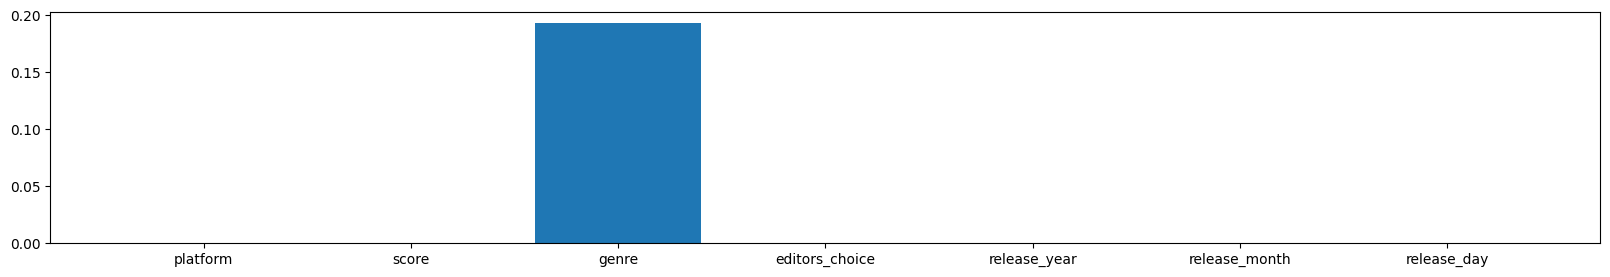

>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN
>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk:  ['genre']
>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:
	- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns
	- Tisztítást követő méret: 18589 rows × 8 columns


,platform,score,genre,editors_choice,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,iPad,8.5,Puzzle,N,2012,9,12
3,Xbox 360,8.5,Sports,N,2012,9,11
4,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,N,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Xbox One,10.0,Adventure,Y,2016,6,28


In [3]:
#adat típusok és hiányzó adatok ellenőrzése, elemzése, esetleges kezelése

dtypes = list()
for dtype in ignData.dtypes:
    dtypes.append(dtype)

print('>>> adattípusok(dtypes): ', dtypes)
#------------------------------------------

ign_values_list = list()
cols_list = list()
for col in ignData.columns:
    pct_missing = np.mean(ignData[col].isnull())*100
    cols_list.append(col)
    ign_values_list.append(pct_missing)
print('>>> hiányzó adatok százaléka: ', ign_values_list)
#------------------------------------------


pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = ign_values_list

plt.figure(figsize=(20, 3))
plt.bar(pct_missing_df['col'], pct_missing_df['pct_missing'])
plt.show()
print('>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN')
#------------------------------------------

less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.4) & (pct_missing_df.pct_missing > 0), 'col'].values)
ignData.dropna(subset=less_missing_values_cols_list, inplace=True)

print('>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk: ', less_missing_values_cols_list)

print('>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:')
print('\t- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns')
print('\t- Tisztítást követő méret: 18589 rows × 8 columns')
ignData

### Stringek int-é alakítása

In [4]:
#a biztonság kedvéért inkább copy-zok, nehogy elcsesszek valamit, mert akkor futtathatjuk úrja az elejétől
copiedData = ignData.copy()

#platform oszlop distinct elemeinek száma
platformCol = copiedData['platform']
platformNames = platformCol.drop_duplicates()
uniquePlatform = platformNames.count()

#genre distinct ertekei
genreCol = copiedData['genre']
genreNames = genreCol.drop_duplicates()
uniqueGenre = genreNames.count()

#editor's choice
editorsChoice = copiedData['editors_choice']
yesOrNo = editorsChoice.drop_duplicates()
uniqueChoice = yesOrNo.count()

print('num of unique platforms =',uniquePlatform, ', num of unique genres =',uniqueGenre)
platformIndexes = []
genreIndexes = []
choiceIndexes = []

editorsChoiceJSON = {}
i=0
for choice in editorsChoice:
    if (yesOrNo.values.__contains__(choice)):
        index, = np.where(yesOrNo.values == choice)
        key = (index[0]+1)*10
        choiceIndexes.append(key)
        editorsChoiceJSON[str(key)] = choice
    i+=1

platformJSON = {}
i=0
for platformName in platformCol:
    if (platformNames.values.__contains__(platformName)):
        index, = np.where(platformNames.values == platformName)
        key = index[0]+1
        platformIndexes.append(key)
        platformJSON[str(key)] = platformName
    i+=1

genreJSON = {}
i=0
for genreName in genreCol:
    if (genreNames.values.__contains__(genreName)):
        index, = np.where(genreNames.values == genreName)
        key = index[0]+1
        genreIndexes.append(key)
        genreJSON[str(key)] = genreName
    i+=1


copiedData['platform'] = platformIndexes
copiedData['genre'] = genreIndexes
copiedData['editors_choice'] = choiceIndexes



print('Lehet látni, hogy szépen át lett minden string alakítva int-re')
copiedData

num of unique platforms = 59 , num of unique genres = 112
Lehet látni, hogy szépen át lett minden string alakítva int-re


,platform,score,genre,editors_choice,release_year,release_month,release_day
0,1,9.0,1,10,2012,9,12
1,1,9.0,1,10,2012,9,12
2,2,8.5,2,20,2012,9,12
3,3,8.5,3,20,2012,9,11
4,4,8.5,3,20,2012,9,11
...,...,...,...,...,...,...,...
18620,13,7.6,6,20,2016,6,29
18621,12,9.0,7,10,2016,6,29
18622,12,5.8,6,20,2016,6,28
18623,55,10.0,8,10,2016,6,28


In [5]:
import json
with open('service/editorsChoice.json', 'w', encoding='utf-8') as f:
    json.dump(editorsChoiceJSON, f, ensure_ascii=False, indent=4)

with open('service/platformName.json', 'w', encoding='utf-8') as f:
    json.dump(platformJSON, f, ensure_ascii=False, indent=4)

with open('service/genreName.json', 'w', encoding='utf-8') as f:
    json.dump(genreJSON, f, ensure_ascii=False, indent=4)    


## Most, hogy megvan az adattisztítás kezdjül el felépíteni a train és teszt adatainkat

In [6]:
from sklearn.model_selection import train_test_split
import torch

In [7]:
#első körben szétválasztjuk a be és kimeneti adatainkat, majd ezeket sétszedjük a megszokott módon train és teszt adathalmazokba
X, y = copiedData.drop('score', axis=1), copiedData['score']
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

y_train, y_test

(10088    9.4
 8118     6.0
 509      9.0
 2861     8.9
 17593    6.5
         ... 
 11293    8.6
 11977    4.0
 5394     8.9
 864      3.0
 15826    7.0
 Name: score, Length: 14871, dtype: float64,
 4684     9.5
 10267    6.7
 2365     8.4
 1431     7.8
 3302     8.3
         ... 
 17042    7.0
 14702    7.0
 10510    8.7
 11253    7.0
 4568     8.7
 Name: score, Length: 3718, dtype: float64)

In [8]:
X_train_raw

,platform,genre,editors_choice,release_year,release_month,release_day
10088,6,11,10,2007,11,5
8118,6,4,20,2006,6,13
509,16,5,10,1996,11,26
2861,24,5,10,2001,1,4
17593,4,9,20,2014,2,25
...,...,...,...,...,...,...
11293,11,3,10,2008,8,8
11977,42,11,20,2008,11,17
5394,6,3,20,2003,11,24
864,17,3,20,1998,6,17


In [9]:
X_test_raw.to_csv('X_test.csv')
X_test_raw

,platform,genre,editors_choice,release_year,release_month,release_day
4684,31,6,10,2003,3,17
10267,8,47,20,2007,12,5
2365,6,4,20,2000,7,21
1431,17,9,20,1999,7,27
3302,24,9,20,2001,9,24
...,...,...,...,...,...,...
17042,6,6,20,2013,5,7
14702,3,14,20,2010,5,25
10510,3,9,10,2008,2,4
11253,4,8,20,2008,8,5


## Kezdjük el a modellek definiálását és feltanítását
### 1.modell: Lineáris regressziós Neurális háló

before scaling:        platform  genre  editors_choice  release_year  release_month  \
10088         6     11              10          2007             11   

       release_day  
10088            5  
after scaling: [[-0.76957407 -0.02012694 -2.07859867  0.10497883  1.1104085  -1.22302369]]
x_train shape before: (1, 6)
x_train shape after: (1, 6)


Epoch 1, iteration 1:   1%|          | 16/1488 [00:00<00:06, 239.27batch/s, MAE=7.73]

Epoch 100, iteration 1: 100%|██████████| 1488/1488 [00:05<00:00, 282.20batch/s, MAE=0.00338]


MAE: 0.0005
RMAE: 0.0224


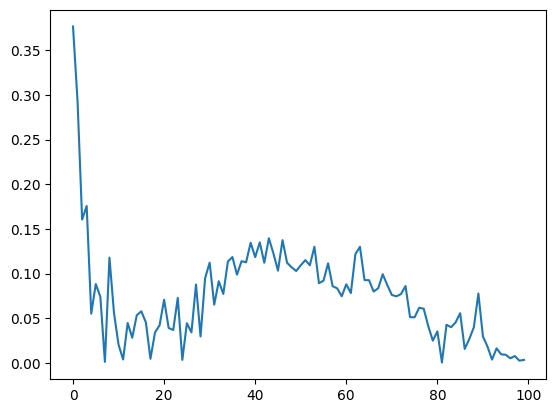

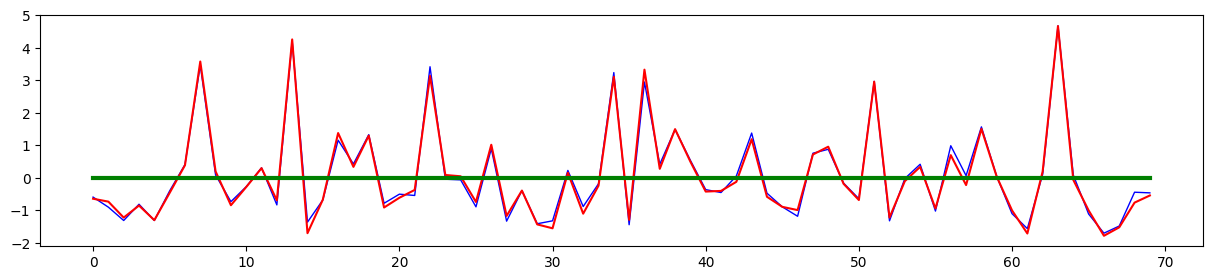

tensor done


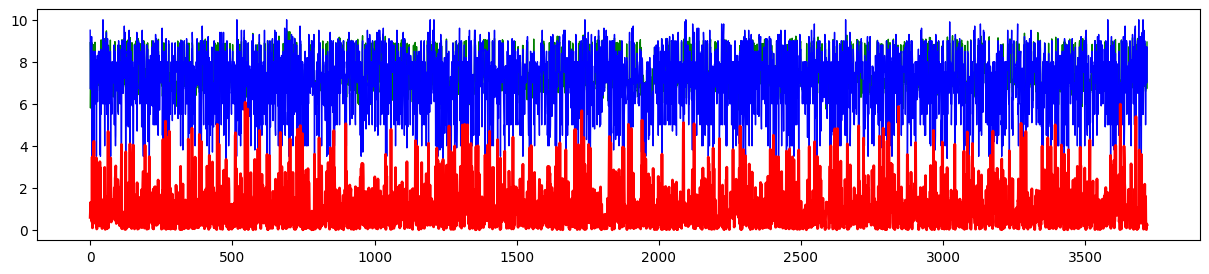

AVG MAE:1.0353012372243142
MAX MAE:6.07
MIN MAE:0.0


In [10]:
from linreg import LinearRegressionNN
#from logreg import LogisticRegressionNN

linreg = LinearRegressionNN()
#linreg = LogisticRegressionNN()
linreg.createLinRegModel()
linreg.trainNetwork(X_train_raw, y_train, X_test_raw, y_test, epochs = 100, batch_num=10, iteration=1)

linreg.plotTrainingHistory()
linreg.compareWithBestLinregModel(X_test_raw, y_test, sample_size=70)
linreg.evaluateModel(X_test_raw, y_test)

## Exportáljuk ki ONNX modellbe

In [11]:
#from onnx import __version__, IR_VERSION
#from onnx.defs import onnx_opset_version
#print(f"onnx.__version__={__version__!r}, opset={onnx_opset_version()}, IR_VERSION={IR_VERSION}")

#linreg.export_to_ONNX_model()

import torch.onnx
import torch.nn as nn
import torch.onnx
import torch
import onnx
import onnx.version_converter

#setting up
model = nn.Sequential(
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)

model.load_state_dict(torch.load('models/LinRegNN_best.pt'))
#model.load_state_dict(torch.load('models/LinRegNN_best.pt'))

model.eval()
arraydefault = [[1, 1, 10, 2010, 1, 1]]
array = linreg.linreg.scaler.transform(arraydefault)

#dummy_input = torch.ones(1, 6)
dummy_input = torch.tensor(array, dtype=torch.float32)

print('dummy inputs:', dummy_input)

#preexport output
torch_out = model(dummy_input)

#export
onnxPath = 'webapp/vuetifyWebApp/public/onnx_model.onnx'
torch.onnx.export(model, dummy_input, onnxPath, verbose=True, export_params=True)

onn = onnx.load(onnxPath)
onnx.checker.check_model(onn)
onnx.checker.check_graph(onn.graph)
print(onnx.helper.printable_graph(onn.graph))

#onnx.version_converter.convert_version(onn, 14)
#onnx.save(onn, 'onnx_model.onnx')

dummy inputs: tensor([[-1.1624, -0.8933, -2.0786,  0.7568, -1.7641, -1.6844]])
============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

graph torch_jit (
  %onnx::Gemm_0[FLOAT, 1x6]
) initializers (
  %0.weight[FLOAT, 10x6]
  %0.bias[FLOAT, 10]
  %2.weight[FLOAT, 10x10]
  %2.bias[FLOAT, 10]
  %4.weight[FLOAT, 1x10]
  %4.bias[FLOAT, 1]
) {
  %/0/Gemm_output_0 = Gemm[alpha = 1, beta = 1, transB = 1](%onnx::Gemm_0, %0.weight, %0.bias)
  %/1/Relu_output_0 = Relu(%/0/Gemm_output_0)
  %/2/Gemm_output_0 = Gemm[alpha = 1, beta = 1, transB = 1](%/1/Relu_output_0, %2.weight, %2.bias)
  %/3/Relu_output_0 = Relu(%/2/Gemm_output_0)
  %11 = Gemm[alpha = 1, beta = 1, transB = 1](%/3/Relu_output_0, %4.weight, %4.bias)
  return %11
}


c:\Users\Csabi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Let's compare the pytorch and ONNX models to see if the export was succesfull

In [12]:
import onnxruntime

ort_session = onnxruntime.InferenceSession(onnxPath)

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
ort_outs = ort_session.run(None, ort_inputs)

print('test for onnx model correction, with input:', arraydefault[0])
print('\tpytorch:',to_numpy(torch_out)[0][0])
print('\tONNX:\t', ort_outs[0][0][0])

test for onnx model correction, with input: [1, 1, 10, 2010, 1, 1]
	pytorch: 8.858299
	ONNX:	 8.8583


### Exportáljuk ki a scalert is

In [13]:
linreg.linreg.saveScaler()

# Nézzük meg a problémát regressziós decesion tree-vel

In [14]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=10)
clf = clf.fit(X_train_raw, y_train)



## Hasonlítsuk össze a NN-ös linreggel

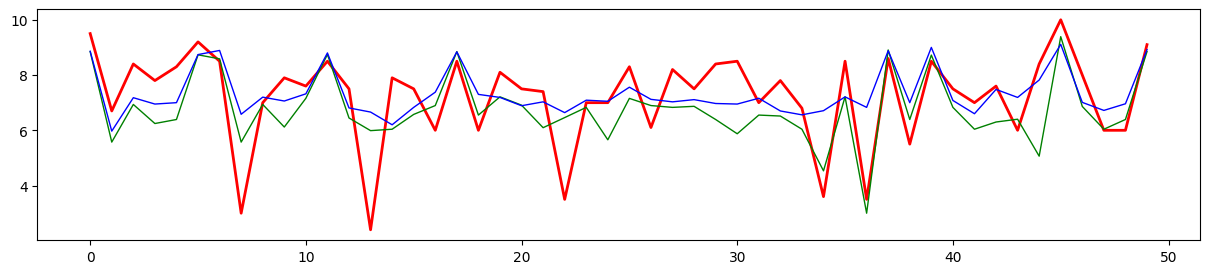

tree's MAE: 1.063
linear regression's MAE: 1.0112


In [15]:
from NN import neuralNetwork

default = nn.Sequential(
            nn.Linear(6, 10),
            linreg.activation_fn(),
            nn.Linear(10, 10),
            linreg.activation_fn(),
            nn.Linear(10, 1),
        )
linreg.linreg.model.eval()
best = torch.load('models/LinRegNN_best.pt')
bestReg = neuralNetwork(default)
bestReg.model.load_state_dict(best)

preds = []
exp = []
preds2 = []
score1 = []
score2 = []
for i in range(50):
    X_sample = X_test_raw[i: i+1]
    
    X_sample2 = linreg.linreg.scaler.transform(X_sample)
    X_sample2 = torch.tensor(X_sample2, dtype=torch.float32)

    y_pred = clf.predict(X_sample)
    y_pred2 = bestReg.model(X_sample2)
    
    result = round(y_pred[0]*1.0, 2)
    result2 = round(y_pred2[0].detach().numpy()[0]*1.0, 2)
    expected = round(y_test.to_numpy()[i]*1.0, 2)
    
    
    preds.append(y_pred)
    preds2.append(result2)
    exp.append(expected)
    score1.append(expected-result)
    score2.append(expected-result2)
    

#tree.plot_tree(clf)

plt.figure(figsize=(15, 3))
plt.plot(exp, color='red', label='expected value', linewidth=2)
plt.plot(preds, 'g', label='tree preds', linewidth=1)
plt.plot(preds2, 'b', label='linReg preds' , linewidth=1)
plt.show()

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(clf, X_test_raw, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(score1)
print(f"tree's MAE:", mean(scores))

scores = absolute(score2)
print(f"linear regression's MAE:", mean(scores))

# Nézzük meg mit tud a Ridge regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_raw, y_train)

Ridge()

## Hasonlítsuk össze az NN linreg modellel

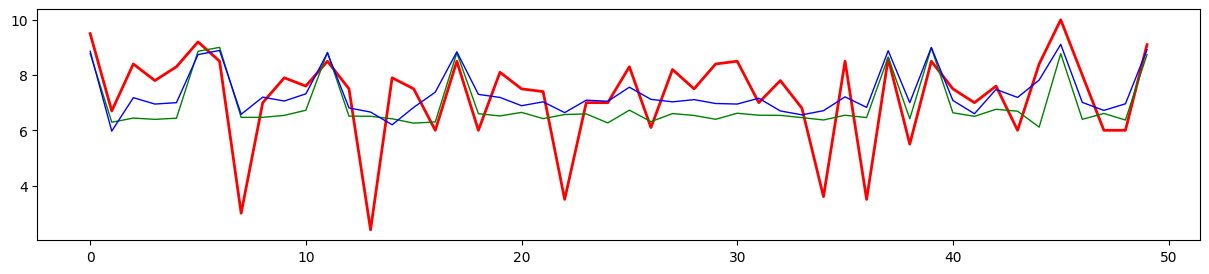

tree's MAE: 1.1828
linear regression's MAE: 1.0112


In [17]:
from NN import neuralNetwork

default = nn.Sequential(
            nn.Linear(6, 10),
            linreg.activation_fn(),
            nn.Linear(10, 10),
            linreg.activation_fn(),
            nn.Linear(10, 1),
        )
linreg.linreg.model.eval()
best = torch.load('models/LinRegNN_best.pt')
bestReg = neuralNetwork(default)
bestReg.model.load_state_dict(best)

preds = []
exp = []
preds2 = []
score1 = []
score2 = []
for i in range(50):
    X_sample = X_test_raw[i: i+1]
    
    X_sample2 = linreg.linreg.scaler.transform(X_sample)
    X_sample2 = torch.tensor(X_sample2, dtype=torch.float32)

    y_pred = ridge.predict(X_sample)
    y_pred2 = bestReg.model(X_sample2)
    
    result = round(y_pred[0]*1.0, 2)
    result2 = round(y_pred2[0].detach().numpy()[0]*1.0, 2)
    expected = round(y_test.to_numpy()[i]*1.0, 2)
    
    
    preds.append(y_pred)
    preds2.append(result2)
    exp.append(expected)
    score1.append(expected-result)
    score2.append(expected-result2)
    

#tree.plot_tree(clf)

plt.figure(figsize=(15, 3))
plt.plot(exp, color='red', label='expected value', linewidth=2)
plt.plot(preds, 'g', label='tree preds', linewidth=1)
plt.plot(preds2, 'b', label='linReg preds' , linewidth=1)
plt.show()

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(clf, X_test_raw, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(score1)
print(f"tree's MAE:", mean(scores))

scores = absolute(score2)
print(f"linear regression's MAE:", mean(scores))

In [18]:
print('')
'''model.eval()
testResults = []
base=[]
res=[]
expecteds=[]

sample_size = 50

with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(sample_size):
        X_sample = X_test_raw[i: i+1]
        X_sample = linreg.scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
                
        y_pred = linreg.model(X_sample)

        result = round(y_pred[0].numpy()[0]*1.0, 2)
        expected = round(y_test.to_numpy()[i]*1.0, 2)
        inference = round(result-expected, 2)

        expecteds.append(expected)
        res.append(result)
        testResults.append(inference)
        base.append(0)
testResults

fig, ax = plt.subplots()

x = np.linspace(0, sample_size-1, sample_size)
ax.fill_between(x, expecteds, res, alpha=.5, linewidth=0)
ax.plot(res, linewidth=2)
ax.plot(expecteds)

plt.show()'''

'model.eval()\ntestResults = []\nbase=[]\nres=[]\nexpecteds=[]\n\nsample_size = 50\n\nwith torch.no_grad():\n    # Test out inference with 5 samples\n    for i in range(sample_size):\n        X_sample = X_test_raw[i: i+1]\n        X_sample = linreg.scaler.transform(X_sample)\n        X_sample = torch.tensor(X_sample, dtype=torch.float32)\n                \n        y_pred = linreg.model(X_sample)\n\n        result = round(y_pred[0].numpy()[0]*1.0, 2)\n        expected = round(y_test.to_numpy()[i]*1.0, 2)\n        inference = round(result-expected, 2)\n\n        expecteds.append(expected)\n        res.append(result)\n        testResults.append(inference)\n        base.append(0)\ntestResults\n\nfig, ax = plt.subplots()\n\nx = np.linspace(0, sample_size-1, sample_size)\nax.fill_between(x, expecteds, res, alpha=.5, linewidth=0)\nax.plot(res, linewidth=2)\nax.plot(expecteds)\n\nplt.show()'